In [1]:
import pandas as pd

In [29]:
df = pd.read_csv("crash_data.csv")

/Users/natemcdowell/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (19,20,73,77,78,79,80,81,82,83,84,183,189) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [30]:
df.head()

,CRASH_CRN,DISTRICT,CRASH_COUNTY,MUNICIPALITY,POLICE_AGCY,CRASH_YEAR,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,HOUR_OF_DAY,...,LANE_COUNT,RDWY_ORIENT,ROAD_OWNER,ROUTE,SPEED_LIMIT,SEGMENT,OFFSET,STREET_NAME,TOT_INJ_COUNT,SCHOOL_BUS_UNIT
0,2004000001,11,2,2454,02454,2004,1,5,257.0,2.0,...,2.0,E,2.0,2032,35.0,10.0,1000.0,LEWIS RUN RD,NaN,NaN
1,2004000010,11,2,2440,02440,2004,1,5,1027.0,10.0,...,2.0,W,3.0,NaN,35.0,NaN,NaN,COAL VALLEY RD,NaN,NaN
2,2004000016,11,2,2203,02203,2004,1,5,1839.0,18.0,...,2.0,W,2.0,3082,35.0,NaN,NaN,CLINTON FRANKFORT RD,NaN,NaN
3,2004000022,11,2,2404,02404,2004,1,6,914.0,9.0,...,2.0,N,4.0,NaN,25.0,NaN,NaN,NORTH BALPH AV,NaN,NaN
4,2004000030,11,2,2419,02419,2004,1,5,2230.0,22.0,...,2.0,S,4.0,NaN,20.0,NaN,NaN,THORNBERRY DR,NaN,NaN


In [31]:
num = 0
for col in df.columns:
    num += 1
    
print(num)

190


In [32]:
df['STREET_NAME']

0                 LEWIS RUN RD
1               COAL VALLEY RD
2         CLINTON FRANKFORT RD
3               NORTH BALPH AV
4                THORNBERRY DR
                  ...         
204893             MCKNIGHT RD
204894     ALLEGHENY VALLEY EX
204895               SENECA ST
204896                 FORD ST
204897         PENN LINCOLN PY
Name: STREET_NAME, Length: 204898, dtype: object

In [33]:
for col in df.columns:
    weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis=1)
    if len(df[weird]) > 0:
        print(col)

POLICE_AGCY
SCH_BUS_IND
SCH_ZONE_IND
LATITUDE
LONGITUDE
NTFY_HIWY_MAINT
TFC_DETOUR_IND
WORK_ZONE_IND
WORKERS_PRES
WZ_CLOSE_DETOUR
WZ_FLAGGER
WZ_LAW_OFFCR_IND
WZ_LN_CLOSURE
WZ_MOVING
WZ_OTHER
WZ_SHLDER_MDN
RDWY_ORIENT
ROUTE
STREET_NAME
SCHOOL_BUS_UNIT


In [34]:
coords = df[['LATITUDE','LONGITUDE']]

In [35]:
coords

,LATITUDE,LONGITUDE
0,NaN,NaN
1,40 19:05.530,79 54:27.197
2,40 29:18.923,80 20:13.631
3,NaN,NaN
4,NaN,NaN
...,...,...
204893,40 30:41.281,80 00:13.786
204894,40 35:53.878,79 46:09.243
204895,40 26:15.716,79 58:33.302
204896,40 26:30.681,80 03:25.664


In [36]:
import seaborn as sns

<AxesSubplot:>

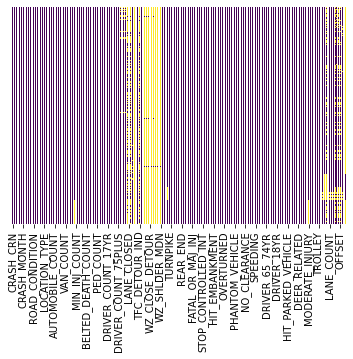

In [37]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [38]:
perc = 50.0 # Like N %
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
df = df.dropna( axis=1, 
                thresh=min_count)

In [39]:
num = 0
for col in df.columns:
    num += 1
    
print(num)

172


<AxesSubplot:>

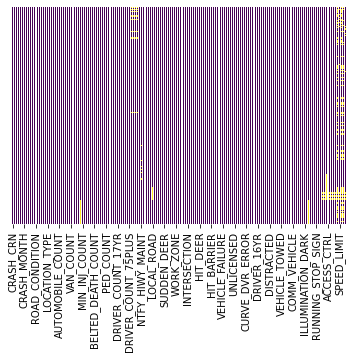

In [40]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [42]:
print(df.shape)
for col in df.columns:
    print(col)

# if we have lat and long we dont need any other location data 
# all time data
# weather and light 
# type of crash 
# road_condition
# could create different dataframes for different things
    # ie what they hit, what was involved, weather, 

(204898, 172)
CRASH_CRN
DISTRICT
CRASH_COUNTY
MUNICIPALITY
POLICE_AGCY
CRASH_YEAR
CRASH_MONTH
DAY_OF_WEEK
TIME_OF_DAY
HOUR_OF_DAY
ILLUMINATION
WEATHER
ROAD_CONDITION
COLLISION_TYPE
RELATION_TO_ROAD
INTERSECT_TYPE
TCD_TYPE
URBAN_RURAL
LOCATION_TYPE
SCH_BUS_IND
SCH_ZONE_IND
TOTAL_UNITS
PERSON_COUNT
VEHICLE_COUNT
AUTOMOBILE_COUNT
MOTORCYCLE_COUNT
BUS_COUNT
SMALL_TRUCK_COUNT
HEAVY_TRUCK_COUNT
SUV_COUNT
VAN_COUNT
BICYCLE_COUNT
FATAL_COUNT
INJURY_COUNT
MAJ_INJ_COUNT
MOD_INJ_COUNT
MIN_INJ_COUNT
UNK_INJ_DEG_COUNT
UNK_INJ_PER_COUNT
UNBELTED_OCC_COUNT
UNB_DEATH_COUNT
UNB_MAJ_INJ_COUNT
BELTED_DEATH_COUNT
BELTED_MAJ_INJ_COUNT
MCYCLE_DEATH_COUNT
MCYCLE_MAJ_INJ_COUNT
BICYCLE_DEATH_COUNT
BICYCLE_MAJ_INJ_COUNT
PED_COUNT
PED_DEATH_COUNT
PED_MAJ_INJ_COUNT
COMM_VEH_COUNT
MAX_SEVERITY_LEVEL
DRIVER_COUNT_16YR
DRIVER_COUNT_17YR
DRIVER_COUNT_18YR
DRIVER_COUNT_19YR
DRIVER_COUNT_20YR
DRIVER_COUNT_50_64YR
DRIVER_COUNT_65_74YR
DRIVER_COUNT_75PLUS
LATITUDE
LONGITUDE
DEC_LAT
DEC_LONG
LANE_CLOSED
NTFY_HIWY_MAINT
TC

In [43]:
df['DAY_OF_WEEK'].unique()

array([5, 6, 7, 1, 2, 3, 4])

In [46]:
times = df[['CRASH_CRN','CRASH_YEAR' , 'CRASH_MONTH', 'DAY_OF_WEEK', 'TIME_OF_DAY', 'HOUR_OF_DAY']]

In [47]:
times
#time of day needs the colon for time data

,CRASH_CRN,CRASH_YEAR,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,HOUR_OF_DAY
0,2004000001,2004,1,5,257.0,2.0
1,2004000010,2004,1,5,1027.0,10.0
2,2004000016,2004,1,5,1839.0,18.0
3,2004000022,2004,1,6,914.0,9.0
4,2004000030,2004,1,5,2230.0,22.0
...,...,...,...,...,...,...
204893,2021017633,2020,10,7,1845.0,18.0
204894,2021018779,2020,12,6,630.0,6.0
204895,2021019758,2020,12,4,1245.0,12.0
204896,2021021042,2020,11,3,1830.0,18.0


In [48]:
location = df[['CRASH_CRN', 'DISTRICT', 'CRASH_COUNTY', 'MUNICIPALITY','LATITUDE','LONGITUDE','LOCATION_TYPE','DEC_LAT','DEC_LONG', 'STREET_NAME']]

In [49]:
location

,CRASH_CRN,DISTRICT,CRASH_COUNTY,MUNICIPALITY,LATITUDE,LONGITUDE,LOCATION_TYPE,DEC_LAT,DEC_LONG,STREET_NAME
0,2004000001,11,2,2454,NaN,NaN,0,40.3234,-79.9404,LEWIS RUN RD
1,2004000010,11,2,2440,40 19:05.530,79 54:27.197,0,40.3182,-79.9076,COAL VALLEY RD
2,2004000016,11,2,2203,40 29:18.923,80 20:13.631,0,40.4886,-80.3371,CLINTON FRANKFORT RD
3,2004000022,11,2,2404,NaN,NaN,0,NaN,NaN,NORTH BALPH AV
4,2004000030,11,2,2419,NaN,NaN,0,NaN,NaN,THORNBERRY DR
...,...,...,...,...,...,...,...,...,...,...
204893,2021017633,11,2,2116,40 30:41.281,80 00:13.786,0,40.5115,-80.0038,MCKNIGHT RD
204894,2021018779,11,2,2464,40 35:53.878,79 46:09.243,0,40.5983,-79.7692,ALLEGHENY VALLEY EX
204895,2021019758,11,2,2301,40 26:15.716,79 58:33.302,0,40.4377,-79.9759,SENECA ST
204896,2021021042,11,2,2301,40 26:30.681,80 03:25.664,0,40.4419,-80.0571,FORD ST


In [50]:
crash_count = [['TOTAL_UNITS
PERSON_COUNT
VEHICLE_COUNT
AUTOMOBILE_COUNT
MOTORCYCLE_COUNT
BUS_COUNT
SMALL_TRUCK_COUNT
HEAVY_TRUCK_COUNT
SUV_COUNT
VAN_COUNT
BICYCLE_COUNT
FATAL_COUNT
HIT_DEER
HIT_TREE_SHRUB
HIT_EMBANKMENT
HIT_POLE
HIT_GDRAIL
HIT_GDRAIL_END
HIT_BARRIER
HIT_BRIDGE
MOTORCYCLE
BICYCLE
']]

SyntaxError: EOL while scanning string literal (<ipython-input-50-cb94462c9832>, line 1)